In [9]:
import os
import random
import shutil
from pathlib import Path

# 数据集路径
data_dir = "./animals_data/animal_data"
train_dir = "./final_data/train"
val_dir = "./final_data/val"

# 创建train和val文件夹
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# 获取所有类别子文件夹

# 获取所有类别子文件夹
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# 定义训练集和验证集的划分比例
train_ratio = 0.8

# 遍历每个类别子文件夹
for category in categories:
    category_path = os.path.join(data_dir, category)
    
    # 获取该类别文件夹下的所有JPEG文件
    images = [f for f in os.listdir(category_path) 
              if os.path.isfile(os.path.join(category_path, f)) and (f.lower().endswith(".jpg") or f.lower().endswith(".jpeg"))]
    
    # 打乱图片列表
    random.shuffle(images)
    
    # 划分训练集和验证集
    train_size = int(train_ratio * len(images))
    train_images = images[:train_size]
    val_images = images[train_size:]
    
    # 创建类别子文件夹
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)
    
    # 将图片复制到对应的文件夹
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))
        
    for image in val_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(val_category_dir, image))
    
    print(f"Processed category: {category}, Train images: {len(train_images)}, Val images: {len(val_images)}")

print("Dataset split completed!")

Processed category: Deer, Train images: 101, Val images: 26
Processed category: Zebra, Train images: 109, Val images: 28
Processed category: Lion, Train images: 104, Val images: 27
Processed category: Dog, Train images: 97, Val images: 25
Processed category: Cat, Train images: 98, Val images: 25
Processed category: Tiger, Train images: 103, Val images: 26
Processed category: Giraffe, Train images: 103, Val images: 26
Processed category: Bird, Train images: 109, Val images: 28
Processed category: Panda, Train images: 108, Val images: 27
Processed category: Horse, Train images: 104, Val images: 26
Processed category: Bear, Train images: 100, Val images: 25
Processed category: Kangaroo, Train images: 100, Val images: 26
Processed category: Elephant, Train images: 106, Val images: 27
Processed category: Dolphin, Train images: 103, Val images: 26
Processed category: Cow, Train images: 104, Val images: 27
Dataset split completed!


In [10]:
import os
import shutil
import random

# 数据集路径
val_dir = "./final_data/val"
infer_dir = "./final_data/infer"

# 创建infer文件夹
os.makedirs(infer_dir, exist_ok=True)

# 获取所有类别子文件夹
categories = [d for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d))]

# 遍历每个类别子文件夹
for category in categories:
    category_path = os.path.join(val_dir, category)
    
    # 获取该类别文件夹下的所有JPEG文件
    images = [f for f in os.listdir(category_path) 
              if os.path.isfile(os.path.join(category_path, f)) and f.lower().endswith(".jpeg")]
    
    if not images:
        print(f"No JPEG images found in category: {category}")
        continue
    
    # 随机选择一张图片
    selected_image = random.choice(images)
    
    # 构建新文件名和目标路径
    new_image_name = f"{category}.jpeg"
    new_image_path = os.path.join(infer_dir, new_image_name)
    
    # 移动并重命名图片
    shutil.move(os.path.join(category_path, selected_image), new_image_path)
    
    print(f"Moved and renamed image: {selected_image} -> {new_image_name}")

print("Infer dataset creation completed!")

Moved and renamed image: Deer_25.jpeg -> Deer.jpeg
Moved and renamed image: Zebra_9.jpeg -> Zebra.jpeg
Moved and renamed image: Lion_13.jpeg -> Lion.jpeg
Moved and renamed image: Dog_13.jpeg -> Dog.jpeg
Moved and renamed image: Cat_7.jpeg -> Cat.jpeg
Moved and renamed image: Tiger_7.jpeg -> Tiger.jpeg
Moved and renamed image: Giraffe_9.jpeg -> Giraffe.jpeg
Moved and renamed image: Bird_11.jpeg -> Bird.jpeg
Moved and renamed image: Panda_29.jpeg -> Panda.jpeg
Moved and renamed image: Horse_12.jpeg -> Horse.jpeg
Moved and renamed image: Bear_13.jpeg -> Bear.jpeg
Moved and renamed image: Kangaroo_8.jpeg -> Kangaroo.jpeg
Moved and renamed image: Elephant_15.jpeg -> Elephant.jpeg
Moved and renamed image: Dolphin_17.jpeg -> Dolphin.jpeg
Moved and renamed image: Cow_26.jpeg -> Cow.jpeg
Infer dataset creation completed!


In [1]:
import mindspore.dataset as ds
import mindspore.dataset.vision as vision

path = "./final_data"

def create_dataset(path, batch_size=10, train=True, image_size=224):
    dataset = ds.ImageFolderDataset(path,
                                    num_parallel_workers=8,
                                    class_indexing={"Bear": 0, "Bird": 1, "Cat": 2, "Cow": 3, "Deer": 4,  "Dog": 5, "Dolphin": 6, "Elephant": 7, "Giraffe": 8, "Horse": 9, "Kangaroo": 10, "Lion": 11, "Panda": 12, "Tiger": 13, "Zebra": 14})

    # 图像增强操作
    mean = [0.485 * 255, 0.456 * 255, 0.406 * 255]
    std = [0.229 * 255, 0.224 * 255, 0.225 * 255]
    if train:
        trans = [
            vision.c_transforms.RandomCropDecodeResize(image_size, scale=(0.08, 1.0), ratio=(0.75, 1.333)),
            vision.c_transforms.RandomHorizontalFlip(prob=0.5),
            vision.c_transforms.Normalize(mean=mean, std=std),
            vision.c_transforms.HWC2CHW()
        ]
    else:
        trans = [
            vision.c_transforms.Decode(),
            vision.c_transforms.Resize(256),
            vision.c_transforms.CenterCrop(image_size),
            vision.c_transforms.Normalize(mean=mean, std=std),
            vision.c_transforms.HWC2CHW()
        ]

    dataset = dataset.map(operations=trans, input_columns="image", num_parallel_workers=8)
    # 设置batch_size的大小，若最后一次抓取的样本数小于batch_size，则丢弃
    dataset = dataset.batch(batch_size, drop_remainder=True)
    return dataset

/home/mindspore/miniconda/envs/jupyter/lib/python3.9/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mindspore/miniconda/envs/jupyter/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/mindspore/miniconda/envs/jupyter/lib/python3.9/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/mindspore/miniconda/envs/jupyter/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
train_path = "./final_data/train"
dataset_train = create_dataset(train_path, train=True)

# 加载验证数据集
val_path = "./final_data/val"
dataset_val = create_dataset(val_path, train=False)

[WARNING] ME(27294:281473228774272,MainProcess):2024-08-29-07:06:45.522.162 [mindspore/dataset/core/validator_helpers.py:744] 'RandomCropDecodeResize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomCropDecodeResize' from mindspore.dataset.vision instead.
[WARNING] ME(27294:281473228774272,MainProcess):2024-08-29-07:06:45.523.059 [mindspore/dataset/core/validator_helpers.py:744] 'RandomHorizontalFlip' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'RandomHorizontalFlip' from mindspore.dataset.vision instead.
[WARNING] ME(27294:281473228774272,MainProcess):2024-08-29-07:06:45.523.790 [mindspore/dataset/core/validator_helpers.py:744] 'Normalize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Normalize' from mindspore.dataset.vision instead.
[WARNING] ME(27294:281473228

In [6]:
from mindvision.dataset import DownLoad

models_url = "https://download.mindspore.cn/vision/classification/resnet50_224.ckpt"

dl = DownLoad()
# 下载预训练模型文件
dl.download_url(models_url, "./new_checkpoints")

102459392B [00:01, 94124975.90B/s]                                


In [7]:
import mindspore.nn as nn
import mindspore as ms
from mindvision.classification.models import resnet50
from mindvision.engine.loss import CrossEntropySmooth

# 创建模型,其中目标分类数为15，图像输入大小为(224,224)
network = resnet50(num_classes=15)

# 模型参数存入到param_dict
param_dict = ms.load_checkpoint("./new_checkpoints/resnet50_224.ckpt")

# 获取resnet50网络最后一个卷积层的参数名
filter_list = [x.name for x in network.head.get_parameters()]

# 删除预训练模型的最后一个卷积层
def filter_ckpt_parameter(origin_dict, param_filter):
    for key in list(origin_dict.keys()):
        for name in param_filter:
            if name in key:
                print("Delete parameter from checkpoint: ", key)
                del origin_dict[key]
                break

filter_ckpt_parameter(param_dict, filter_list)

# 加载预训练模型参数作为网络初始化权重
ms.load_param_into_net(network, param_dict)

# 定义优化器
network_opt = nn.Momentum(params=network.trainable_params(), learning_rate=0.05, momentum=0.9)
# network_opt = nn.Adam(params=network.trainable_params(), learning_rate=0.001)


# 定义损失函数
network_loss = CrossEntropySmooth(sparse=True, reduction="mean", smooth_factor=0.05, classes_num=15)
# network_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 定义评价指标
metrics = {"Accuracy": nn.Accuracy()}

# 初始化模型
model = ms.Model(network, loss_fn=network_loss, optimizer=network_opt, metrics=metrics)

[WARNING] ME(27294:281473228774272,MainProcess):2024-08-29-07:08:54.507.725 [mindspore/nn/layer/basic.py:177] For Dropout, this parameter `keep_prob` will be deprecated, please use `p` instead.
[WARNING] ME(27294:281473228774272,MainProcess):2024-08-29-07:08:54.891.177 [mindspore/train/serialization.py:1560] For 'load_param_into_net', 2 parameters in the 'net' are not loaded, because they are not in the 'parameter_dict', please check whether the network structure is consistent when training and loading checkpoint.
[WARNING] ME(27294:281473228774272,MainProcess):2024-08-29-07:08:54.892.099 [mindspore/train/serialization.py:1564] ['head.dense.weight', 'head.dense.bias'] are not loaded.


Delete parameter from checkpoint:  head.dense.weight
Delete parameter from checkpoint:  head.dense.bias


In [14]:
from mindvision.engine.callback import ValAccMonitor
from mindspore.train.callback import TimeMonitor

num_epochs = 20

# 模型训练与验证，训练完成后保存验证精度最高的ckpt文件（best.ckpt）到当前目录下
time_cb = TimeMonitor()
model.train(num_epochs,
            dataset_train,
            callbacks=[ValAccMonitor(model, dataset_val, num_epochs, ckpt_directory="./new_checkpoints"), time_cb])

[WARNING] ME(27294:281473228774272,MainProcess):2024-08-29-07:25:51.654.417 [mindspore/train/model.py:1328] For ValAccMonitor callback, {'end', 'epoch_end'} methods may not be supported in later version, Use methods prefixed with 'on_train' or 'on_eval' instead when using customized callbacks.


--------------------
Epoch: [  1 /  20], Train Loss: [1.270], Accuracy:  0.529
Train epoch time: 17785.787 ms, per step time: 115.492 ms
--------------------
Epoch: [  2 /  20], Train Loss: [1.762], Accuracy:  0.484
Train epoch time: 17307.052 ms, per step time: 112.383 ms
--------------------
Epoch: [  3 /  20], Train Loss: [1.897], Accuracy:  0.484
Train epoch time: 17160.518 ms, per step time: 111.432 ms
--------------------
Epoch: [  4 /  20], Train Loss: [1.571], Accuracy:  0.576
Train epoch time: 17747.698 ms, per step time: 115.245 ms
--------------------
Epoch: [  5 /  20], Train Loss: [1.280], Accuracy:  0.624
Train epoch time: 18097.646 ms, per step time: 117.517 ms
--------------------
Epoch: [  6 /  20], Train Loss: [1.284], Accuracy:  0.532
Train epoch time: 16926.333 ms, per step time: 109.911 ms
--------------------
Epoch: [  7 /  20], Train Loss: [0.892], Accuracy:  0.568
Train epoch time: 17055.768 ms, per step time: 110.752 ms
--------------------
Epoch: [  8 /  20], 

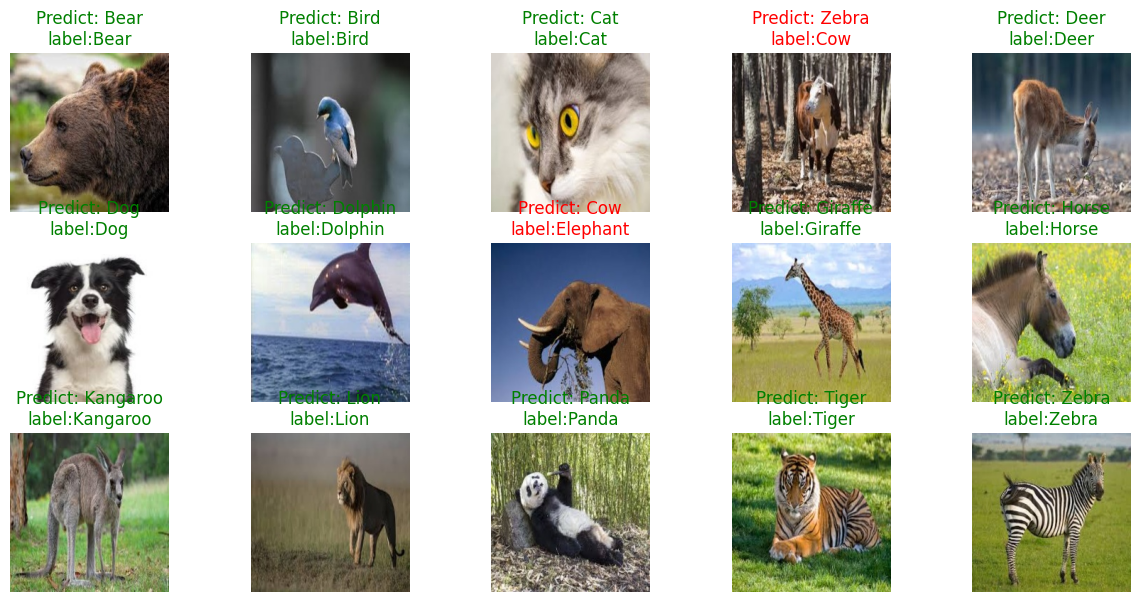

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mindvision.classification.models import resnet50
import mindspore as ms

def visualize_model(image_path, label):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((224, 224))
    plt.imshow(image)

    # 归一化处理
    mean = np.array([0.485 * 255, 0.456 * 255, 0.406 * 255])
    std = np.array([0.229 * 255, 0.224 * 255, 0.225 * 255])
    image = np.array(image)
    image = (image - mean) / std
    image = image.astype(np.float32)

    # 图像通道由(h, w, c)转换为(c, h, w)
    image = np.transpose(image, (2, 0, 1))

    # 扩展数据维数为(1, c, h, w)
    image = np.expand_dims(image, axis=0)

    # 定义并加载网络
    net = network
    param_dict = ms.load_checkpoint("./new_checkpoints/best.ckpt")
    ms.load_param_into_net(net, param_dict)
    model = ms.Model(net)

    # 模型预测
    pre = model.predict(ms.Tensor(image))
    result = np.argmax(pre)

    class_name = {0: "Bear", 1: "Bird", 2: "Cat", 3: "Cow", 4: "Deer", 5: "Dog", 6: "Dolphin", 7: "Elephant", 8: "Giraffe", 9: "Horse", 10: "Kangaroo", 11: "Lion", 12: "Panda", 13: "Tiger", 14: "Zebra"}
    color = 'green' if class_name[result] == label else 'red'

    plt.title(f"Predict: {class_name[result]}\nlabel:{label}", color=color)
    plt.axis("off")
    return result

image1 = "./final_data/infer/Bear.jpeg"
plt.figure(figsize=(15, 7))
plt.subplot(3, 5, 1)
visualize_model(image1, "Bear")

image2 = "./final_data/infer/Bird.jpeg"
plt.subplot(3, 5, 2)
visualize_model(image2, "Bird")

image3 = "./final_data/infer/Cat.jpeg"
plt.subplot(3, 5, 3)
visualize_model(image3, "Cat")

image4 = "./final_data/infer/Cow.jpeg"
plt.subplot(3, 5, 4)
visualize_model(image4, "Cow")

image5 = "./final_data/infer/Deer.jpeg"
plt.subplot(3, 5, 5)
visualize_model(image5, "Deer")

image6 = "./final_data/infer/Dog.jpeg"
plt.subplot(3, 5, 6)
visualize_model(image6, "Dog")

image7 = "./final_data/infer/Dolphin.jpeg"
plt.subplot(3, 5, 7)
visualize_model(image7, "Dolphin")

image8 = "./final_data/infer/Elephant.jpeg"
plt.subplot(3, 5, 8)
visualize_model(image8, "Elephant")

image9 = "./final_data/infer/Giraffe.jpeg"
plt.subplot(3, 5, 9)
visualize_model(image9, "Giraffe")

image10 = "./final_data/infer/Horse.jpeg"
plt.subplot(3, 5, 10)
visualize_model(image10, "Horse")

image11 = "./final_data/infer/Kangaroo.jpeg"
plt.subplot(3, 5, 11)
visualize_model(image11, "Kangaroo")

image12 = "./final_data/infer/Lion.jpeg"
plt.subplot(3, 5, 12)
visualize_model(image12, "Lion")

image13 = "./final_data/infer/Panda.jpeg"
plt.subplot(3, 5, 13)
visualize_model(image13, "Panda")

image14 = "./final_data/infer/Tiger.jpeg"
plt.subplot(3, 5, 14)
visualize_model(image14, "Tiger")

image15 = "./final_data/infer/Zebra.jpeg"
plt.subplot(3, 5, 15)
visualize_model(image15, "Zebra")

plt.show()